# Use different databases for the training and compare results

## import libs

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import seaborn as sns

## load and prepare data

In [3]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol2 sampling
data_sobol1 = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol1 = data_sobol1.drop(data_sobol1.columns[0], axis=1)
X_sobol1 = data_sobol1.drop('density', axis=1)
Y_sobol1 = data_sobol1['density']
#print(f'{data_sobol1}')
#print(f'{X_sobol1}')
#print(f'{Y_sobol1}')

## sobol2 sampling
data_sobol2 = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
data_sobol2 = data_sobol2.drop(data_sobol2.columns[0], axis=1)
X_sobol2 = data_sobol2.drop('density', axis=1)
Y_sobol2 = data_sobol2['density']
#print(f'{data_sobol2}')
#print(f'{X_sobol2}')
#print(f'{Y_sobol2}')


## random integer
taken from another script

In [4]:
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')

## split data by using different random states

In [5]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling 1
X_TRAINsSobol1 = []
X_TESTsSobol1 = []
Y_TRAINsSobol1 = []
Y_TESTsSobol1 = []

## sobol sampling 2
X_TRAINsSobol2 = []
X_TESTsSobol2 = []
Y_TRAINsSobol2 = []
Y_TESTsSobol2 = []

for i in random_ints:
    #print(f'{i}')
    ## use the X_test, Y_test data for testing combined with all the data of the other datasets
    X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=0.05, random_state=i)
    X_TRAINs1296.append(X_train)
    Y_TRAINs1296.append(Y_train)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    X_test = pd.concat([X_test, X_2401, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_2401, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs1296.append(X_test)
    Y_TESTs1296.append(Y_test)
    #print(f'{X_test}')
    #print(f'{Y_test}')

    
    X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=0.05, random_state=i)
    X_TRAINs2401.append(X_train),
    Y_TRAINs2401.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs2401.append(X_test)
    Y_TESTs2401.append(Y_test)

    
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol1, Y_sobol1, test_size=0.05, random_state=i)
    X_TRAINsSobol1.append(X_train)
    Y_TRAINsSobol1.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol2], ignore_index=True)
    X_TESTsSobol1.append(X_test)
    Y_TESTsSobol1.append(Y_test)

    
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol2, Y_sobol2, test_size=0.05, random_state=i)
    X_TRAINsSobol2.append(X_train)
    Y_TRAINsSobol2.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol1], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol1], ignore_index=True)
    X_TESTsSobol2.append(X_test)
    Y_TESTsSobol2.append(Y_test)

    

## create and train models

In [6]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []
SPEARMANRs1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []
SPEARMANRs2401 = []

## sobol sampling 1
MODELsSobol1 = []
Y_PREDICTIONsSobol1 = []
RMSEsSobol1 = []
R2sSobol1 = []
SPEARMANRsSobol1 = []

## sobol sampling 2
MODELsSobol2 = []
Y_PREDICTIONsSobol2 = []
RMSEsSobol2 = []
R2sSobol2 = []
SPEARMANRsSobol2 = []

for i in range(0, len(random_ints)):
    ## creation of the pipeline
    model1296 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    #
    model2401 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    #
    modelSobol1 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    #
    modelSobol2 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())


    ## train/fit the model
    model1296.fit(X_TRAINs1296[i], Y_TRAINs1296[i])
    MODELs1296.append(model1296)
    #
    model2401.fit(X_TRAINs2401[i], Y_TRAINs2401[i])
    MODELs2401.append(model2401)
    #
    modelSobol1.fit(X_TRAINsSobol1[i], Y_TRAINsSobol1[i])
    MODELsSobol1.append(modelSobol1)
    #
    modelSobol2.fit(X_TRAINsSobol2[i], Y_TRAINsSobol2[i])
    MODELsSobol2.append(modelSobol2)
    
    ## prediction using the test set
    Y_prediction1296 = model1296.predict(X_TESTs1296[i])
    Y_PREDICTIONs1296.append(Y_prediction1296)
    #
    Y_prediction2401 = model2401.predict(X_TESTs2401[i])
    Y_PREDICTIONs2401.append(Y_prediction2401)
    #
    Y_predictionSobol1 = modelSobol1.predict(X_TESTsSobol1[i])
    Y_PREDICTIONsSobol1.append(Y_predictionSobol1)
    #
    Y_predictionSobol2 = modelSobol2.predict(X_TESTsSobol2[i])
    Y_PREDICTIONsSobol2.append(Y_predictionSobol2)
    
    ## evaluate with Y_test
    rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[i], Y_prediction1296))
    r21296 = r2_score(Y_TESTs1296[i], Y_prediction1296)
    spearman_r1296 = stats.spearmanr(Y_TESTs1296[i], Y_prediction1296)
    RMSEs1296.append(rmse1296)
    R2s1296.append(r21296)
    SPEARMANRs1296.append(spearman_r1296.statistic)
    #
    rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[i], Y_prediction2401))
    r22401 = r2_score(Y_TESTs2401[i], Y_prediction2401)
    spearman_r2401 = stats.spearmanr(Y_TESTs2401[i], Y_prediction2401)
    RMSEs2401.append(rmse2401)
    R2s2401.append(r22401)
    SPEARMANRs2401.append(spearman_r2401.statistic)
    #
    rmseSobol1 = np.sqrt(mean_squared_error(Y_TESTsSobol1[i], Y_predictionSobol1))
    r2Sobol1 = r2_score(Y_TESTsSobol1[i], Y_predictionSobol1)
    spearman_rSobol1 = stats.spearmanr(Y_TESTsSobol1[i], Y_predictionSobol1)
    RMSEsSobol1.append(rmseSobol1)
    R2sSobol1.append(r2Sobol1)
    SPEARMANRsSobol1.append(spearman_rSobol1.statistic)
    #
    rmseSobol2 = np.sqrt(mean_squared_error(Y_TESTsSobol2[i], Y_predictionSobol2))
    r2Sobol2 = r2_score(Y_TESTsSobol2[i], Y_predictionSobol2)
    spearman_rSobol2 = stats.spearmanr(Y_TESTsSobol2[i], Y_predictionSobol2)
    RMSEsSobol2.append(rmseSobol2)
    R2sSobol2.append(r2Sobol2)
    SPEARMANRsSobol2.append(spearman_rSobol2.statistic)


## Plot RMSEs and R2s

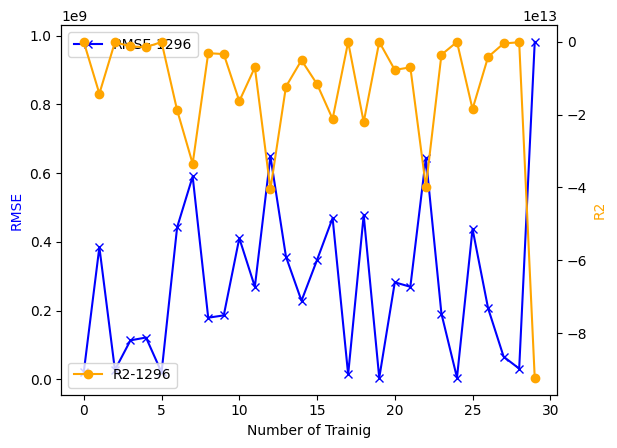

In [7]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(RMSEs1296, '-x', color='blue', label='RMSE-1296')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2s1296, '-o', color='orange', label='R2-1296')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('PolyRegr_GRID1296-Training_with_different_randomseeds_for_data_splits.png')

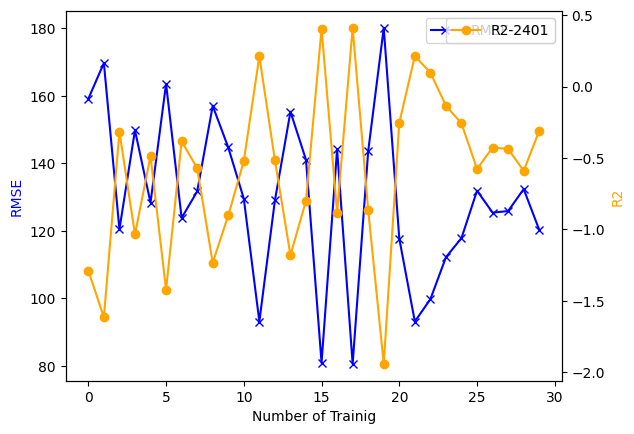

In [8]:
## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(RMSEs2401, '-x', color='blue', label='RMSE-2401')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2s2401, '-o', color='orange', label='R2-2401')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('PolyRegr_GRID2401-Training_with_different_randomseeds_for_data_splits.png')

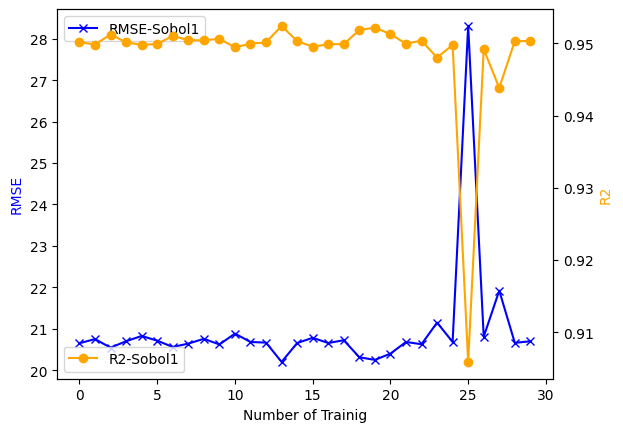

In [9]:
## Sobol Sampling 1
fig, ax1 = plt.subplots()
ax1.plot(RMSEsSobol1, '-x', color='blue', label='RMSE-Sobol1')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2sSobol1, '-o', color='orange', label='R2-Sobol1')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('PolyRegr_Sobol1-Training_with_different_randomseeds_for_data_splits.png')

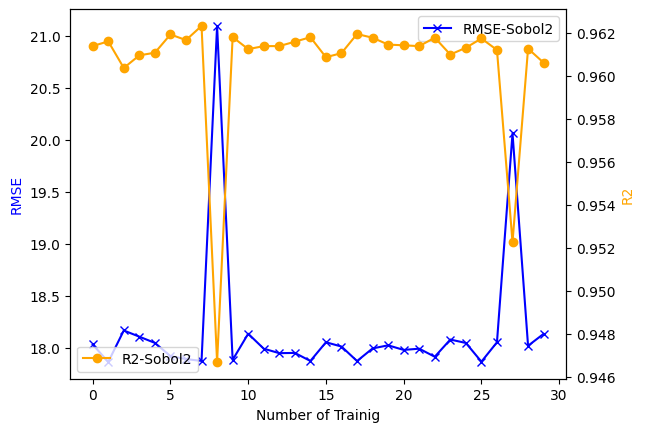

In [10]:
## Sobol Sampling 2
fig, ax1 = plt.subplots()
ax1.plot(RMSEsSobol2, '-x', color='blue', label='RMSE-Sobol2')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2sSobol2, '-o', color='orange', label='R2-Sobol2')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('PolyRegr_Sobol2-Training_with_different_randomseeds_for_data_splits.png')

## means of RMSE and R2 and SpearmanR

In [11]:
## Grid Sample 1296
print(f'GRID SAMPLE 1296')
print(f'avg. RMSE: {np.mean(RMSEs1296)}')
print(f'Std Dev: {np.std(RMSEs1296)}')
#print(f'Variance: {np.var(RMSEs1296)}')
print(f'avg. R2: {np.mean(R2s1296)}')
print(f'Std Dev: {np.std(R2s1296)}')
#print(f'Variance: {np.var(R2s1296)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRs1296)}')
print(f'Std Dev: {np.std(SPEARMANRs1296)}')

print(f'\nGRID SAMPLE 2401')
print(f'avg. RMSE: {np.mean(RMSEs2401)}')
print(f'Std Dev: {np.std(RMSEs2401)}')
#print(f'Variance: {np.var(RMSEs2401)}')
print(f'avg. R2: {np.mean(R2s2401)}')
print(f'Std Dev: {np.std(R2s2401)}')
#print(f'Variance: {np.var(R2s2401)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRs2401)}')
print(f'Std Dev: {np.std(SPEARMANRs2401)}')

print(f'\nSobol Sampling 1')
print(f'avg. RMSE: {np.mean(RMSEsSobol1)}')
print(f'Std Dev: {np.std(RMSEsSobol1)}')
#print(f'Variance: {np.var(RMSEsSobol1)}')
print(f'avg. R2: {np.mean(R2sSobol1)}')
print(f'Std Dev: {np.std(R2sSobol1)}')
#print(f'Variance: {np.var(R2sSobol)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRsSobol1)}')
print(f'Std Dev: {np.std(SPEARMANRsSobol1)}')

print(f'\nSobol Sampling 2')
print(f'avg. RMSE: {np.mean(RMSEsSobol2)}')
print(f'Std Dev: {np.std(RMSEsSobol2)}')
#print(f'Variance: {np.var(RMSEsSobol1)}')
print(f'avg. R2: {np.mean(R2sSobol2)}')
print(f'Std Dev: {np.std(R2sSobol2)}')
#print(f'Variance: {np.var(R2sSobol)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRsSobol2)}')
print(f'Std Dev: {np.std(SPEARMANRsSobol2)}')

GRID SAMPLE 1296
avg. RMSE: 281062714.9297146
Std Dev: 233572741.2816654
avg. R2: -12832075612282.25
Std Dev: 18743193457187.977
avg. SpearmanR: 0.0022793225503561854
Std Dev: 0.0034665363158589324

GRID SAMPLE 2401
avg. RMSE: 130.0754611639554
Std Dev: 24.423300526099087
avg. R2: -0.5863830292189578
Std Dev: 0.5705461346726899
avg. SpearmanR: 0.7605394917370325
Std Dev: 0.06882662332476581

Sobol Sampling 1
avg. RMSE: 20.952388413573566
Std Dev: 1.3963741934787905
avg. R2: 0.9486016117403454
Std Dev: 0.008059257701035818
avg. SpearmanR: 0.9688260261521957
Std Dev: 0.007522480619722527

Sobol Sampling 2
avg. RMSE: 18.16324964740645
Std Dev: 0.6649068857143385
avg. R2: 0.9606195835611558
Std Dev: 0.003088998759103389
avg. SpearmanR: 0.9722012593102514
Std Dev: 0.0026442724199001277


In [12]:
## Grid Sample 1296
print(f'GRID SAMPLE 1296')
i = RMSEs1296.index(np.min(RMSEs1296))
print(f'best RMSE: {RMSEs1296[i]}')
print(f'corresp. R2: {R2s1296[i]}')
print(f'corresp. SpearmanR: {SPEARMANRs1296[i]}\n')

## Grid Sample 2401
print(f'GRID SAMPLE 2401')
i = RMSEs2401.index(np.min(RMSEs2401))
print(f'best RMSE: {RMSEs2401[i]}')
print(f'corresp. R2: {R2s2401[i]}')
print(f'corresp. SpearmanR: {SPEARMANRs2401[i]}\n')

## Sobol 1
print(f'Sobol 1')
i = RMSEsSobol1.index(np.min(RMSEsSobol1))
#print(f'{RMSEsSobol1}')
print(f'best RMSE: {RMSEsSobol1[i]}')
print(f'corresp. R2: {R2sSobol1[i]}')
print(f'corresp. SpearmanR: {SPEARMANRsSobol1[i]}\n')

## Sobol 2
print(f'Sobol 2')
i = RMSEsSobol2.index(np.min(RMSEsSobol2))
print(f'best RMSE: {RMSEsSobol2[i]}')
print(f'corresp. R2: {R2sSobol2[i]}')
print(f'corresp. SpearmanR: {SPEARMANRsSobol2[i]}\n')

GRID SAMPLE 1296
best RMSE: 4312696.721830342
corresp. R2: -1793886399.7418835
corresp. SpearmanR: 0.01052589664739242

GRID SAMPLE 2401
best RMSE: 80.62873581281305
corresp. R2: 0.41027536503653883
corresp. SpearmanR: 0.895348397110262

Sobol 1
best RMSE: 20.202205018635023
corresp. R2: 0.9524084940152021
corresp. SpearmanR: 0.9720378291901892

Sobol 2
best RMSE: 17.86470534417486
corresp. R2: 0.9616160332917987
corresp. SpearmanR: 0.9739445006467999



## NOTES:
use all other data except the data used for training for testing (not only the 5%)

Grid Sample 1296:
- really bad extrapolation, since the RMSE/R2 is really bad, when Grid2401 and Sobol are used for testing. Grid2401/Sobol are "larger" than Grid1296

Sobol Sampling is good and better than Grid2401

# END HERE, Does not need to be tested again
# NOTE: Tested database reduction to check if extrapolation does not work well
does not need to be updated anymore. The overall model is not that good and also interpolation does not work well

## remove datapoints outside of Grid2401/Sobol that are outside of Grid1296 and retest
idea: check if bad performance is only due to extraploation

In [31]:
X_2401_red = X_2401
Y_2401_red = Y_2401
#
X_sobol_red = X_sobol1
Y_sobol_red = Y_sobol1

min_sigc_1296 = min(X_1296["SigC"])
max_sigc_1296 = max(X_1296["SigC"])
#print(f'{min_sigc_1296}')
#print(f'{max_sigc_1296}')
min_sigh_1296 = min(X_1296["SigH"])
max_sigh_1296 = max(X_1296["SigH"])
#
min_epsc_1296 = min(X_1296["EpsC"])
max_epsc_1296 = max(X_1296["EpsC"])
#
min_epsh_1296 = min(X_1296["EpsH"])
max_epsh_1296 = max(X_1296["EpsH"])

### reduce Grid2401 ###
for index in X_2401.index:
    #print(f'{index}')
    #print(f'{X_2401_red.iloc[[index]]}')
    sigc = X_2401.iloc[[index]]["SigC"]
    #print(f'{sigc}')
    sigc = sigc.to_numpy()[0]
    #print(f'{sigc}')
    sigh = X_2401.iloc[[index]]["SigH"]
    sigh = sigh.to_numpy()[0]
    #
    epsc = X_2401.iloc[[index]]["EpsC"]
    epsc = epsc.to_numpy()[0]
    #
    epsh = X_2401.iloc[[index]]["EpsH"]
    epsh = epsh.to_numpy()[0]

    if sigc < min_sigc_1296 or sigc > max_sigc_1296:
        #print(f'drop X_2401[{index}] because of sigc = {sigc} and min_sigc_1296 = {min_sigc_1296} or max_sigc_1296 = {max_sigc_1296}')
        X_2401_red = X_2401_red.drop(index=index)
        Y_2401_red = Y_2401_red.drop(index=index)
    elif sigh < min_sigh_1296 or sigh > max_sigh_1296:
        #print(f'drop X_2401[{index}] because of sigh = {sigh} and min_sigh_1296 = {min_sigh_1296} or max_sigh_1296 = {max_sigh_1296}')
        X_2401_red = X_2401_red.drop(index=index)
        Y_2401_red = Y_2401_red.drop(index=index)
    elif epsc < min_epsc_1296 or epsc > max_epsc_1296:
        #print(f'drop X_2401[{index}] because of epsc = {epsc} and min_epsc_1296 = {min_epsc_1296} or max_epsc_1296 = {max_epsc_1296}')
        X_2401_red = X_2401_red.drop(index=index)
        Y_2401_red = Y_2401_red.drop(index=index)
    elif epsh < min_epsh_1296 or epsh > max_epsh_1296:
        #print(f'drop X_2401[{index}] because of epsh = {epsh} and min_epsh_1296 = {min_epsh_1296} or max_epsh_1296 = {max_epsh_1296}')
        X_2401_red = X_2401_red.drop(index=index)
        Y_2401_red = Y_2401_red.drop(index=index)
    
#print(f'{X_2401_red}')
#print(f'{Y_2401_red}')
###

### reduce sobol ###
for index in X_sobol1.index:
    #print(f'{index}')
    #print(f'{X_sobol_red.iloc[[index]]}')
    sigc = X_sobol1.iloc[[index]]["SigC"]
    #print(f'{sigc}')
    sigc = sigc.to_numpy()[0]
    #print(f'{sigc}')
    sigh = X_sobol1.iloc[[index]]["SigH"]
    sigh = sigh.to_numpy()[0]
    #
    epsc = X_sobol1.iloc[[index]]["EpsC"]
    epsc = epsc.to_numpy()[0]
    #
    epsh = X_sobol1.iloc[[index]]["EpsH"]
    epsh = epsh.to_numpy()[0]

    if sigc < min_sigc_1296 or sigc > max_sigc_1296:
        #print(f'drop X_sobol[{index}] because of sigc = {sigc} and min_sigc_1296 = {min_sigc_1296} or max_sigc_1296 = {max_sigc_1296}')
        X_sobol_red = X_sobol_red.drop(index=index)
        Y_sobol_red = Y_sobol_red.drop(index=index)
    elif sigh < min_sigh_1296 or sigh > max_sigh_1296:
        #print(f'drop X_sobol[{index}] because of sigh = {sigh} and min_sigh_1296 = {min_sigh_1296} or max_sigh_1296 = {max_sigh_1296}')
        X_sobol_red = X_sobol_red.drop(index=index)
        Y_sobol_red = Y_sobol_red.drop(index=index)
    elif epsc < min_epsc_1296 or epsc > max_epsc_1296:
        #print(f'drop X_sobol[{index}] because of epsc = {epsc} and min_epsc_1296 = {min_epsc_1296} or max_epsc_1296 = {max_epsc_1296}')
        X_sobol_red = X_sobol_red.drop(index=index)
        Y_sobol_red = Y_sobol_red.drop(index=index)
    elif epsh < min_epsh_1296 or epsh > max_epsh_1296:
        #print(f'drop X_sobol[{index}] because of epsh = {epsh} and min_epsh_1296 = {min_epsh_1296} or max_epsh_1296 = {max_epsh_1296}')
        X_sobol_red = X_sobol_red.drop(index=index)
        Y_sobol_red = Y_sobol_red.drop(index=index)
    
#print(f'{X_sobol_red}')
#print(f'{Y_sobol_red}')
###
X_TESTs1296_red = []
Y_TESTs1296_red = []

Y_PREDICTIONs1296_red = []
RMSEs1296_red = []
R2s1296_red = []
SPEARMANRs1296_red = []

#print(f'{X_TESTs1296}')
for i in range(0, len(random_ints)):
    #print(f'{i}')
    X_test = pd.concat([X_TESTs1296[i], X_2401_red, X_sobol_red], ignore_index=True)
    Y_test = pd.concat([Y_TESTs1296[i], Y_2401_red, Y_sobol_red], ignore_index=True)
    X_TESTs1296_red.append(X_test)
    Y_TESTs1296_red.append(Y_test)

    # "load" trainded model
    model1296 = MODELs1296[i]
    # test model with reduced dataset
    Y_prediction1296_red = model1296.predict(X_test)
    Y_PREDICTIONs1296_red.append(Y_prediction1296_red)
    # evaluate
    rmse1296_red = np.sqrt(mean_squared_error(Y_test, Y_prediction1296_red))
    r21296_red = r2_score(Y_test, Y_prediction1296_red)
    spearman_r1296 = stats.spearmanr(Y_test, Y_prediction1296_red)
    RMSEs1296_red.append(rmse1296_red)
    R2s1296_red.append(r21296_red)
    SPEARMANRs1296_red.append(spearman_r1296.statistic)


## plot RMSE and R2 for reduced testsets

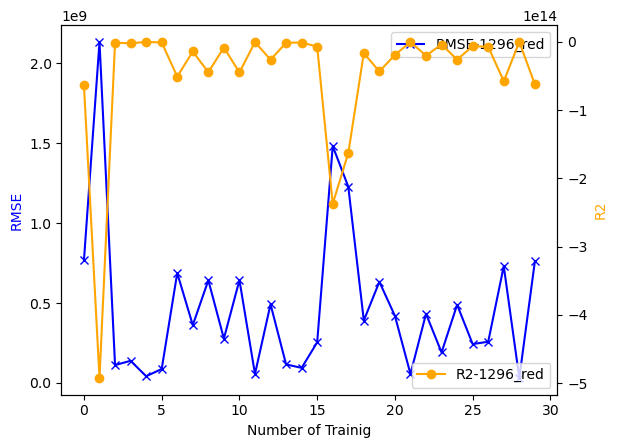

In [32]:
## Grid Sampling 1296 with testing with reduced datasets
fig, ax1 = plt.subplots()
ax1.plot(RMSEs1296_red, '-x', color='blue', label='RMSE-1296_red')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2s1296_red, '-o', color='orange', label='R2-1296_red')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('PolyRegr_GRID1296-Training_with_different_randomseeds_for_data_splits_and_reduced_testdataset.png')

## means of RMSD and R2

In [33]:
## Grid Sample 1296 reduced testset
print(f'GRID SAMPLE 1296 reduced testset')
print(f'avg. RMSE: {np.mean(RMSEs1296_red)}')
print(f'Std Dev: {np.std(RMSEs1296_red)}')
#print(f'Variance: {np.var(RMSEs1296)}')
print(f'avg. R2: {np.mean(R2s1296_red)}')
print(f'Std Dev: {np.std(R2s1296_red)}')
#print(f'Variance: {np.var(R2s1296)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRs1296_red)}')
print(f'Std Dev: {np.std(SPEARMANRs1296_red)}')

GRID SAMPLE 1296 reduced testset
avg. RMSE: 474769830.49789417
Std Dev: 461712091.51942366
avg. R2: -47414938398675.586
Std Dev: 96701537524119.73
avg. SpearmanR: 0.0026421358001711215
Std Dev: 0.0024919994360682054


## Result
it's not only the extrapolation that is bad, it's also the interpolation !?

check results for massive outliers and maybe remove them?

In [36]:
for i in range(0, len(Y_PREDICTIONs1296_red)):
    #print(f'{i}')
    #print(f'{Y_PREDICTIONs1296_red[i]}')
    
    #plt.plot(Y_PREDICTIONs1296_red[i], '.')
    plt.plot(np.sort(Y_PREDICTIONs1296_red[i].sort(), '.'))
    #plt.plot(Y_test, 'x', color='green')
    #plt.show()
   
    break
    

TypeError: 'str' object cannot be interpreted as an integer

This model does not perform well overall, it's not just the extrapolation